In [1]:
#import modules
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import sys
import h5py
import tensorflow.compat.v1 as tf
import tensorflow as tf2

from DlModels import DlModels
from TrainDL import TrainDL
from DataLoader import DataLoader

In [2]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [3]:
tf.config.list_physical_devices('GPU')
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)
tf.keras.backend.set_floatx('float32') #for memory use

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


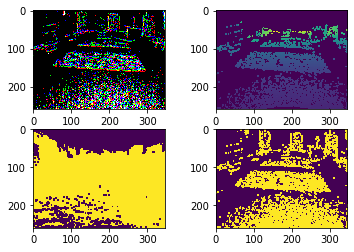

In [4]:
#test batching
data_loader = DataLoader('indoor_flying_augmented.hdf5')

event_images, depth_images, mask_1, mask_2 = data_loader.load_all()

fig = plt.figure()
ax = fig.add_subplot(2, 2, 1)
ax.imshow(np.array(event_images[10][:,:,0:3]))
ax.autoscale(True)
ax2 = fig.add_subplot(2, 2, 2, sharex=ax, sharey=ax)
ax2.imshow(np.array(depth_images[10]))
ax2.autoscale(True)
ax3 = fig.add_subplot(2, 2, 3, sharex=ax, sharey=ax)
ax3.imshow(np.array(mask_1[10]))
ax3.autoscale(True)
ax4 = fig.add_subplot(2, 2, 4, sharex=ax, sharey=ax)
ax4.imshow(np.array(mask_2[10]))
ax4.autoscale(True)
plt.show()


In [5]:
epochs = 30
batch_size = 8
base_learning_rate = 0.001
learning_decay_rate = 10
learning_decay_factor = 0.5
data_loader = DataLoader('indoor_flying_augmented.hdf5')

tf.compat.v1.disable_eager_execution()
input_image = tf.placeholder(tf.float32, [None, None, None, 9], name='input_image')
depth_image = tf.placeholder(tf.float32, [None, None, None, 1], name='depth_image')
mask_image_1 = tf.placeholder(tf.float32, [None, None, None, 1], name='mask_image_1')
mask_image_2 = tf.placeholder(tf.float32, [None, None, None, 1], name='mask_image_2')
learning_rate = tf.placeholder(tf.float32, shape=(), name='learning_rate')

sess = tf.Session()

# Build NN using load_vgg, layers, and optimize function
nn_last_layer = DlModels.vggDecoder(input_image, DlModels.vgg11)

train_op, loss = TrainDL.MSEOptimize(nn_last_layer, depth_image, mask_image_1, mask_image_2, learning_rate)

# Train NN using the train_nn function
TrainDL.train_nn(sess, epochs, batch_size, data_loader, train_op, loss, input_image, depth_image, mask_image_1, mask_image_2, learning_rate, base_learning_rate, learning_decay_rate, learning_decay_factor)
        
# save trained model
saver = tf.train.Saver()
saver.save(sess, './model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Training...

EPOCH 1 ...


UnknownError: 2 root error(s) found.
  (0) Unknown: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node conv1_1/Conv2D (defined at c:\Users\user\OneDrive\KU_research\codes\AI\DL_for_DVS\depth_learning\DlModels.py:64) ]]
	 [[truediv/_93]]
  (1) Unknown: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node conv1_1/Conv2D (defined at c:\Users\user\OneDrive\KU_research\codes\AI\DL_for_DVS\depth_learning\DlModels.py:64) ]]
0 successful operations.
0 derived errors ignored.

Errors may have originated from an input operation.
Input Source operations connected to node conv1_1/Conv2D:
 input_image (defined at <ipython-input-5-97ec2dc4aab3>:9)

Input Source operations connected to node conv1_1/Conv2D:
 input_image (defined at <ipython-input-5-97ec2dc4aab3>:9)

Original stack trace for 'conv1_1/Conv2D':
  File "C:\Users\user\Anaconda3\envs\tensorflow2\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\user\Anaconda3\envs\tensorflow2\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\user\AppData\Roaming\Python\Python37\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel\kernelapp.py", line 583, in start
    self.io_loop.start()
  File "C:\Users\user\AppData\Roaming\Python\Python37\site-packages\tornado\platform\asyncio.py", line 149, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\user\Anaconda3\envs\tensorflow2\lib\asyncio\base_events.py", line 541, in run_forever
    self._run_once()
  File "C:\Users\user\Anaconda3\envs\tensorflow2\lib\asyncio\base_events.py", line 1786, in _run_once
    handle._run()
  File "C:\Users\user\Anaconda3\envs\tensorflow2\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\user\AppData\Roaming\Python\Python37\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "C:\Users\user\AppData\Roaming\Python\Python37\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "C:\Users\user\AppData\Roaming\Python\Python37\site-packages\tornado\gen.py", line 787, in inner
    self.run()
  File "C:\Users\user\AppData\Roaming\Python\Python37\site-packages\tornado\gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel\kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\Users\user\AppData\Roaming\Python\Python37\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel\kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\Users\user\AppData\Roaming\Python\Python37\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel\kernelbase.py", line 545, in execute_request
    user_expressions, allow_stdin,
  File "C:\Users\user\AppData\Roaming\Python\Python37\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py", line 300, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\user\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py", line 2858, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\user\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py", line 2886, in _run_cell
    return runner(coro)
  File "C:\Users\user\AppData\Roaming\Python\Python37\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Users\user\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py", line 3063, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\user\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py", line 3254, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "C:\Users\user\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-97ec2dc4aab3>", line 18, in <module>
    nn_last_layer = DlModels.vggDecoder(input_image, DlModels.vgg11)
  File "c:\Users\user\OneDrive\KU_research\codes\AI\DL_for_DVS\depth_learning\DlModels.py", line 234, in vggDecoder
    encoder_output, layer5, layer4, layer3, layer2, layer1 = encoder(input_tensor)
  File "c:\Users\user\OneDrive\KU_research\codes\AI\DL_for_DVS\depth_learning\DlModels.py", line 64, in vgg11
    name='conv1_1')(input_tensor)
  File "C:\Users\user\Anaconda3\envs\tensorflow2\lib\site-packages\tensorflow_core\python\layers\base.py", line 547, in __call__
    outputs = super(Layer, self).__call__(inputs, *args, **kwargs)
  File "C:\Users\user\Anaconda3\envs\tensorflow2\lib\site-packages\tensorflow_core\python\keras\engine\base_layer.py", line 778, in __call__
    outputs = call_fn(cast_inputs, *args, **kwargs)
  File "C:\Users\user\Anaconda3\envs\tensorflow2\lib\site-packages\tensorflow_core\python\autograph\impl\api.py", line 234, in wrapper
    return converted_call(f, args, kwargs, options=options)
  File "C:\Users\user\Anaconda3\envs\tensorflow2\lib\site-packages\tensorflow_core\python\autograph\impl\api.py", line 459, in converted_call
    return _call_unconverted(f, args, kwargs, options)
  File "C:\Users\user\Anaconda3\envs\tensorflow2\lib\site-packages\tensorflow_core\python\autograph\impl\api.py", line 330, in _call_unconverted
    return f(*args, **kwargs)
  File "C:\Users\user\Anaconda3\envs\tensorflow2\lib\site-packages\tensorflow_core\python\keras\layers\convolutional.py", line 209, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\user\Anaconda3\envs\tensorflow2\lib\site-packages\tensorflow_core\python\ops\nn_ops.py", line 1135, in __call__
    return self.conv_op(inp, filter)
  File "C:\Users\user\Anaconda3\envs\tensorflow2\lib\site-packages\tensorflow_core\python\ops\nn_ops.py", line 640, in __call__
    return self.call(inp, filter)
  File "C:\Users\user\Anaconda3\envs\tensorflow2\lib\site-packages\tensorflow_core\python\ops\nn_ops.py", line 239, in __call__
    name=self.name)
  File "C:\Users\user\Anaconda3\envs\tensorflow2\lib\site-packages\tensorflow_core\python\ops\nn_ops.py", line 2011, in conv2d
    name=name)
  File "C:\Users\user\Anaconda3\envs\tensorflow2\lib\site-packages\tensorflow_core\python\ops\gen_nn_ops.py", line 969, in conv2d
    data_format=data_format, dilations=dilations, name=name)
  File "C:\Users\user\Anaconda3\envs\tensorflow2\lib\site-packages\tensorflow_core\python\framework\op_def_library.py", line 742, in _apply_op_helper
    attrs=attr_protos, op_def=op_def)
  File "C:\Users\user\Anaconda3\envs\tensorflow2\lib\site-packages\tensorflow_core\python\framework\ops.py", line 3322, in _create_op_internal
    op_def=op_def)
  File "C:\Users\user\Anaconda3\envs\tensorflow2\lib\site-packages\tensorflow_core\python\framework\ops.py", line 1756, in __init__
    self._traceback = tf_stack.extract_stack()


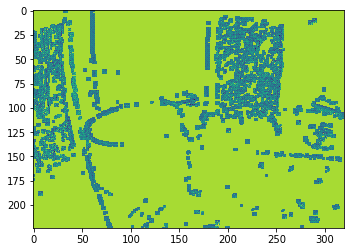

In [6]:
sample_image = event_images[70][0:224, 0:320, :]
est_depth = sess.run([nn_last_layer], feed_dict={input_image: sample_image.reshape(1, 224, 320, 9)})

#plt.imshow(est_depth[0].reshape(target_height, target_width))
plt.imshow(np.multiply(mask_2[70][0:224, 0:320],  est_depth[0].reshape(224, 320)))

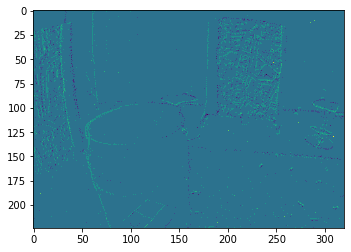

In [7]:
plt.imshow(sample_image[:,:,0])

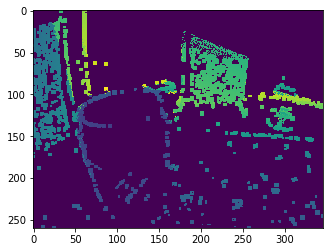

In [8]:
plt.imshow(depth_images[70])